In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("./benchmark_data.csv")
df

,release,static_ssid,strong,implicit,partial,code_size,compute_time,data_sent
0,False,False,False,False,False,82,171,342
1,False,False,False,False,True,83,139,342
2,False,False,False,True,False,83,134,206
3,False,False,False,True,True,83,103,206
4,False,False,True,False,False,88,171,383
5,False,False,True,False,True,88,139,383
6,False,False,True,True,False,87,135,247
7,False,False,True,True,True,88,103,247
8,False,True,False,False,False,81,171,302
9,False,True,False,False,True,82,139,302


In [5]:
df[~df.release]

,release,static_ssid,strong,implicit,partial,code_size,compute_time,data_sent
0,False,False,False,False,False,82,171,342
1,False,False,False,False,True,83,139,342
2,False,False,False,True,False,83,134,206
3,False,False,False,True,True,83,103,206
4,False,False,True,False,False,88,171,383
5,False,False,True,False,True,88,139,383
6,False,False,True,True,False,87,135,247
7,False,False,True,True,True,88,103,247
8,False,True,False,False,False,81,171,302
9,False,True,False,False,True,82,139,302


In [6]:
rel_df = df[df.release]
ser_df = df[~df.release]

rel_df, ser_df

(    release  static_ssid  strong  implicit  partial  code_size  compute_time  \
 16     True        False   False     False    False        132           148   
 17     True        False   False     False     True        137           119   
 18     True        False   False      True    False        132           117   
 19     True        False   False      True     True        138            90   
 20     True        False    True     False    False        139           148   
 21     True        False    True     False     True        142           120   
 22     True        False    True      True    False        139           116   
 23     True        False    True      True     True        142            89   
 24     True         True   False     False    False        131           145   
 25     True         True   False     False     True        136           120   
 26     True         True   False      True    False        132           115   
 27     True         True   

In [7]:
# average code size difference between release mode and server mode
code_sz_diffs = [r-s for (r, s) in zip(rel_df.code_size, ser_df.code_size)]
sum(code_sz_diffs) / len(code_sz_diffs)

52.5

In [8]:
# average compute time difference between release mode and server mode
comp_t_diffs = [r-s for (r, s) in zip(rel_df.compute_time, ser_df.compute_time)]
sum(comp_t_diffs) / len(comp_t_diffs)

-18.8125

In [9]:
def compute_diffs(df, feature):
    df_a = df[df[feature]]
    df_b = df[~df[feature]]
    code_sz_diffs = [r-s for (r, s) in zip(df_a.code_size, df_b.code_size)]
    sz_diff = sum(code_sz_diffs) / len(code_sz_diffs)
    comp_t_diffs = [r-s for (r, s) in zip(df_a.compute_time, df_b.compute_time)]
    ct_diff = sum(comp_t_diffs) / len(comp_t_diffs)
    data_s_diffs = [r-s for (r, s) in zip(df_a.data_sent, df_b.data_sent)]
    ds_diff = sum(data_s_diffs) / len(data_s_diffs)
    return sz_diff, ct_diff, ds_diff

In [10]:
compute_diffs(df, "release")

(52.5, -18.8125, 0.0)

In [11]:
compute_diffs(df, "partial")

(2.375, -29.5625, 0.0)

In [13]:
compute_diffs(df, "implicit")

(0.375, -33.4375, -136.0)

In [14]:
compute_diffs(df, "strong")

(5.375, 0.1875, 41.0)

In [15]:
compute_diffs(df, "static_ssid")

(-0.875, -0.4375, -40.0)

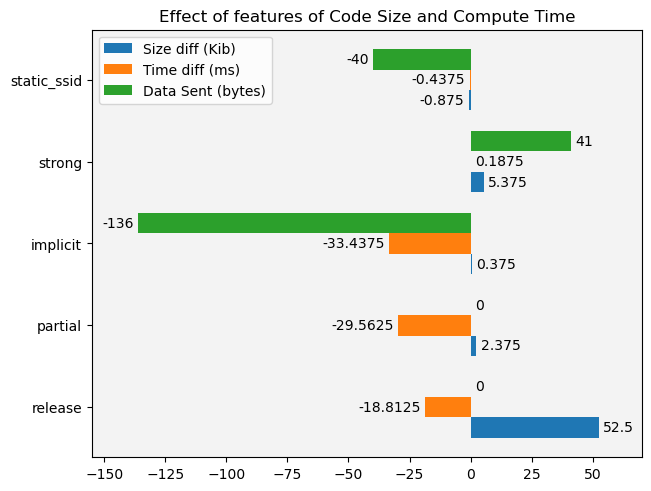

In [17]:
# graph the change in code size and compute time by feature flag
# adapted from https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
# accessed 14/04/2023

# first setup the data
variables = ["release", "partial", "implicit", "strong", "static_ssid"]
measurables = ["Size diff (Kib)", "Time diff (ms)", "Data Sent (bytes)"]
diffs = {
    v: dict(zip(measurables, compute_diffs(df, v)))
    for v in variables
}
data = {
    t: tuple(diffs[v][t] for v in variables)
    for t in measurables
}

# now setup the graph stuff
y = np.arange(len(variables))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout="constrained")

for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.barh(y + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1
    
# ax.set_ylabel('Mean Difference')
ax.set_title('Effect of features of Code Size and Compute Time')
ax.set_yticks(y + width, variables)
ax.legend(loc='upper left')
ax.set_facecolor("#f3f3f3")
ax.set_xlim(-155, 70)

# plt.savefig("/home/tritoke/feature_effects.eps")
plt.show()

In [52]:
def compute_perc_diffs(df, feature):
    df_a = df[df[feature]]
    df_b = df[~df[feature]]
    code_sz_diffs = [100 * (r-s)/s for (r, s) in zip(df_a.code_size, df_b.code_size)]
    sz_diff = sum(code_sz_diffs) / len(code_sz_diffs), min(code_sz_diffs), max(code_sz_diffs)
    comp_t_diffs = [100 * (r-s)/s for (r, s) in zip(df_a.compute_time, df_b.compute_time)]
    ct_diff = sum(comp_t_diffs) / len(comp_t_diffs), min(comp_t_diffs), max(comp_t_diffs)
    data_s_diffs = [100 * (r-s)/s for (r, s) in zip(df_a.data_sent, df_b.data_sent)]
    ds_diff = sum(data_s_diffs) / len(data_s_diffs), min(data_s_diffs), max(data_s_diffs)
    return sz_diff, ct_diff, ds_diff

In [53]:
compute_perc_diffs(df, "static_ssid")

((-0.8584149556820144, -2.272727272727273, 0.0),
 (-0.354766621846865, -2.2222222222222223, 0.8403361344537815),
 (-14.43789459361864, -19.41747572815534, -10.443864229765014))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


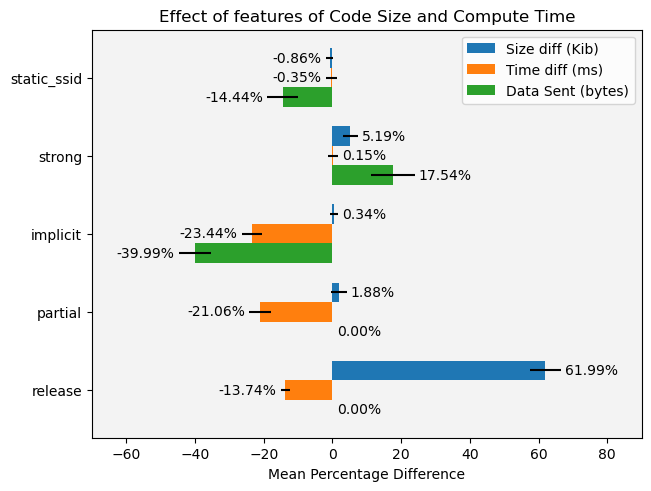

In [64]:
# graph the change in code size and compute time by feature flag
# adapted from https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
# accessed 14/04/2023

# first setup the data
variables = ["release", "partial", "implicit", "strong", "static_ssid"]
measurables = ["Size diff (Kib)", "Time diff (ms)", "Data Sent (bytes)"]
diffs = {
    v: dict(zip(measurables, compute_perc_diffs(df, v)))
    for v in variables
}
data = {
    t: tuple(diffs[v][t] for v in variables)
    for t in measurables
}

# now setup the graph stuff
y = np.arange(len(variables))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout="constrained")

for attribute, measurements in data.items():
    offset = width * multiplier
    m = [x[0] for x in measurements]
    e = [abs(x[2] - x[1]) / 2 for x in measurements]
    rects = ax.barh(y - offset, m, width, xerr=e, label=attribute)
    ax.bar_label(rects, padding=3, fmt="{:.2f}%")
    multiplier += 1
    
ax.set_xlabel('Mean Percentage Difference')
ax.set_title('Effect of features of Code Size and Compute Time')
ax.set_yticks(y - width, variables)
ax.legend(loc='upper right')
ax.set_facecolor("#f3f3f3")
ax.set_xlim(-70, 90)

# plt.savefig("/home/tritoke/feature_effects.eps")
plt.show()

In [68]:
df[df.release].code_size.mean()

137.25

In [69]:
df[~df.release].code_size.mean()

84.75

In [72]:
df[df.release].compute_time.mean(), df[~df.release].compute_time.mean()

(118.0, 136.8125)

In [73]:
df[df.release].data_sent.mean(), df[~df.release].data_sent.mean()

(274.5, 274.5)

In [75]:
df.compute_time.max()

171

In [80]:
df.data_sent.min()

166

In [79]:
486 / df.data_sent.min()

2.927710843373494